In [59]:
from google.colab import drive
drive.mount('/content/drive')
dir = 'drive/MyDrive/colab_data/hope'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np
np.random.seed(1)
from matplotlib import pyplot as plt
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
import network
import imageio

In [61]:
def get_corrupted_input(input, corruption_level):
    corrupted = np.copy(input)
    inv = np.random.binomial(n=1, p=corruption_level, size=len(input))
    for i, v in enumerate(input):
        if inv[i]:
            corrupted[i] = -1 * v
    return corrupted

In [62]:
def reshape(data):
    dim = int(np.sqrt(len(data)))
    data = np.reshape(data, (dim, dim))
    return data

In [63]:
def plot(data, test, predicted, figsize=(5, 6)):
    data = [reshape(d) for d in data]
    test = [reshape(d) for d in test]
    predicted = [reshape(d) for d in predicted]

    fig, axarr = plt.subplots(len(data), 3, figsize=figsize)
    for i in range(len(data)):
        if i==0:
            axarr[i, 0].set_title('Train data')
            axarr[i, 1].set_title("Input data")
            axarr[i, 2].set_title('Output data')

        axarr[i, 0].imshow(data[i])
        axarr[i, 0].axis('off')
        axarr[i, 1].imshow(test[i])
        axarr[i, 1].axis('off')
        axarr[i, 2].imshow(predicted[i])
        axarr[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig("result.png")
    plt.show()

In [64]:
def preprocessing(img, w=13, h=13):
    # Resize image
    img = resize(img, (w,h), mode='reflect')

    # Thresholding
    thresh = threshold_mean(img)
    binary = img > thresh
    shift = 2*(binary*1)-1 # Boolian to int

    # Reshape
    flatten = np.reshape(shift, (w*h))
    return flatten

Start to data preprocessing...
Start to train weights...


100%|██████████| 8/8 [00:00<00:00, 3764.66it/s]


Start to predict...


100%|██████████| 8/8 [00:00<00:00, 2751.04it/s]

Show prediction results...


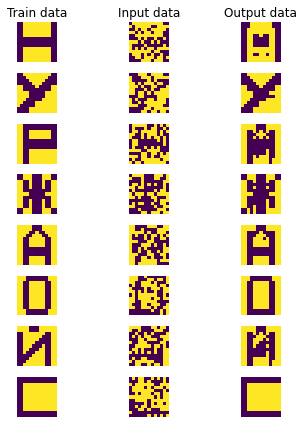

Show network weights matrix...


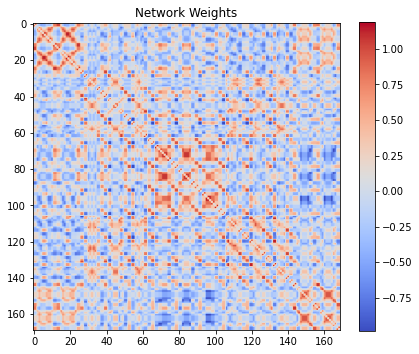

In [65]:
# Load data
data = []
for i in range(8):
    mystring = f'{dir}/x_train/{i}.png'
    im = imageio.imread(mystring)
    im = np.array(im[:,:,0])
    data.append(im)

# Preprocessing
print("Start to data preprocessing...")
data = [preprocessing(d) for d in data]

# Create Hopfield Network Model
model = network.HopfieldNetwork()
model.train_weights(data)

# Generate testset
test = [get_corrupted_input(d, 0.3) for d in data]

predicted = model.predict(test, threshold=0, asyn=False)
print("Show prediction results...")
plot(data, test, predicted)
print("Show network weights matrix...")
model.plot_weights()